# Analyzing North American Covid-19 Data in Python

### Created by Logan Haight

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOynX2aWAdatPubRLJ8L5S7gB2MF4cqyl4HQ&usqp=CAU)

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt

## Background Information on Covid-19 and Afghanistan

According to the World Health Organization (WHO), since Janurary 3rd of 2020 to May of 2021, there have been 60,300 confirmed cases of COVID-19 with a total of 2,642 deaths. As of April 29, 2021, a total of 334,644 vaccincations have been administered.

According to the Afghan–Japan Communicable Disease Hospital director, more than 90% of staff members (doctors/nurses) have been infected since the outbreak, and a second wave is expected to hit as as Winter conditions along with increased violence could lead to a rise in infections. 

Afghanistan recorded its first case of COVID-19 in the western city of Herat in mid-February in a man who had returned from neighbouring Iran, where the virus had begun to spread rapidly. In March, as tens of thousands of migrant Afghan workers crossed the border from Iran back into Afghanistan, the virus spread rapidly as workers piled onto buses and travelled across the country. Lockdown measures were implemented soon afterwards. Infections peaked in May and June before significantly declining.

## The Data

In [2]:
df = pandas.read_excel('s3://logan-ia241-2021spring/COVID-19-geographic-disbtribution-worldwide-2020-12-14 (12).xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Afghanistan Data

In [3]:
afghanistan_data = df.loc[ df['countriesAndTerritories']=='Afghanistan'] 
afghanistan_data[:]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
335,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
336,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
337,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
338,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN


## Afghanistan # of Deaths (2020)

In [11]:
afghanistan_data['deaths'].sum()

1971

## Trend of # of Confirmed Cases

In [7]:
sum_cases_per_day= afghanistan_data.groupby('dateRep').sum()['cases'] 

<AxesSubplot:xlabel='dateRep'>

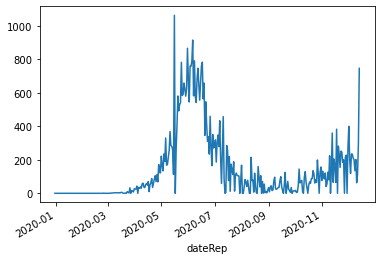

In [8]:
sum_cases_per_day.plot()

## Month with most Deaths in Afghanistan (2020)

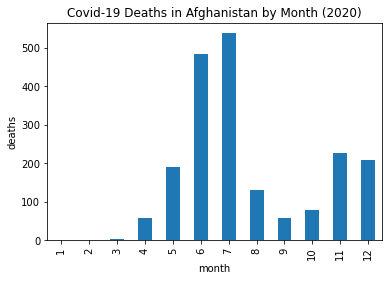

In [9]:
afghanistan_death_sum= afghanistan_data.groupby('month').sum()['deaths']

afghanistan_death_sum.plot.bar()
plt.ylabel('deaths')
plt.title('Covid-19 Deaths in Afghanistan by Month (2020)')
plt.show()

## How Number of Deaths is Related to Number of Cases

<AxesSubplot:xlabel='cases', ylabel='deaths'>

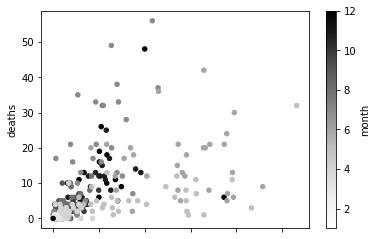

In [7]:
afghanistan_data.plot.scatter(x='cases',y='deaths',c='month')

## Explanation of Calculations

### The Introduction

For the title (and other subheadings), we used markdown and '#','##','###' to separate our Covid-19 data of Afghanistan. 
To import the data source in a hyper link, we simply put the title in brackets [European Centre for Disease Prevention and Control] and placed ()'s with the URL of the website after it. 
For the Afghanistan flag image, we input: ![Afghanistan image](image address) 
To import the data from our S3 bucket, we used the '%matplotlib inline' code which allows the figures in the notebook to render. We also "import pandas" to have a library where we can manipulate the data 

### The Data

To import the data of the top ten rows displayed in the Covid-19 Distribution spreadsheet, we copied the S3 URL of our Covid-19 data and used code:
'df=pandas.read_excel(S3 URL) 
df[:10]'
To import the data of the top ten rows of Afghanistan specifically, we made "afghanistan_data" a variable and used the df.loc function to access the group of rows by the label 'countriesAndTerritories'

### Number of Deaths

To calculate the number of deaths for all 339 rows of data under 'Afghanistan', we used the variable 'afghanistan_data' and placed what label we were looking for ['deaths'] in brackets, and then used the '.sum()' function to find that labels total in all rows

### Trend of Confirmed Cases

To find the trend of the number of confirmed cases in Afghanistan, we created a variable 'sum_cases_per_day' and used the groupby() function to split the data into two groups '('dateRep')' and '['cases']'. We then placed our variable and used .plot() function to input the graph onto the notebook

### Month with most Deaths

To find the month with the most deaths, we created variable 'afghanistan_death_sum' and used groupby() function to pair "months' and 'deaths'. We used the code .plot.bar() to input a bar graph of the variable. We then used the 'plt' function to plot the y label as deaths, the title as 'Covid-19 Deaths in Afghanistan by Month (2020)', and to show the data.

### How Number of Deaths is Related to Number of Cases

To input a scatter plot to compare the data of covid cases to deaths and months, we used the variable 'afghanistan_data' and the function plot.scatter() to plot the data of our three labels.

## Interpretation of Visualizations

### The Data

The visualizations for the entire data set, and for Afghanistan data, are represented to show the top ten rows of Covid-19 distribution data for both 6900 rows (of all countries) and for the 339 rows of Afghanistan data. 

### Trend of Confirmed Cases

The line chart displayed to show the trend of cases visualizes data by 'Daterep' and 'cases'. When we look at the graph, we see no cases until 2020-04 and then see a gradual increase and fluxuation in the number of cases. The peak of covid-19 confirmed cases in Afghanistan seems to be between 2020-05 and 2020-07. Visualization of the cases shows a trend of increasing cases (a 2nd wave as talked about in the background section) towards the end of 2020 (the graph)

### Month with most Deaths in Afghanistan

The bar chart to display the month with the most deaths displays the data of 'months' and 'deaths' in Afghanistan. The 7th month, or July, was found to be the month with the most deaths in Afghanistan at roughly over 500 deaths. 

### How Number of Deaths is Related to Number of Cases

To compare 'cases' with 'deaths' and 'months', a scatter plot was able to show us the correlation of the data. The scatter plot  shows a moderate correlation between cases, months, and deaths within the same time frame. We see that most cases and deaths occur in months 1-4, and most deaths pertain to 10 or lower in this time frame. 